# Logistic Regression Case Study on Lead Scoring

#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
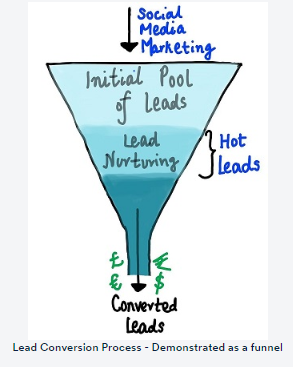
    
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not.

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. 

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.    

# Importing Necessary Libraries

In [1]:
# For Analysis
import pandas as pd
import numpy as np

# For Visulazation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

# Data Loading

In [2]:
lead_score=pd.read_csv("Leads.csv")

In [3]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the sahpe of dataset
lead_score.shape

(9240, 37)

We have 9240 rows and 37 columns in our lead dataset

In [5]:
lead_score["Converted"].unique() # Binary Classification

array([0, 1], dtype=int64)

In [6]:
# Checking the Non-null,Count and Datetype of the Variables
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All the datatypes of the variables are in correct format

In [7]:
#  Checking Stastical analysis for the numerical columns
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From above description about counts,we can see missing values

# Data Cleaning

1) Handling the 'Select' level that is present in many of the categorical variables.
   we can observe that there are'select' values from many columns user doesnot select any option from list hencethe default is 'select'.Select values are as good as NULL .So we can convert these values to null values.

In [8]:
# Converting the "Select " values to NAN
lead_score=lead_score.replace("Select",np.nan)

In [9]:
#Checking for null Values in Columns
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Finding the null values in Percentage
round(100*lead_score.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We see that some columns have high percentage of missing values .We can drop te columns with missing values greater than 40%.

In [11]:
# Dropping the columns with missing values greater than 40%.
lead_score=lead_score.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [12]:
# Finding the null percentage across columns after removing the greater than 40% of null values
round(100*lead_score.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### 1)Columns:"Specialization"
This column has 37% Missing Values

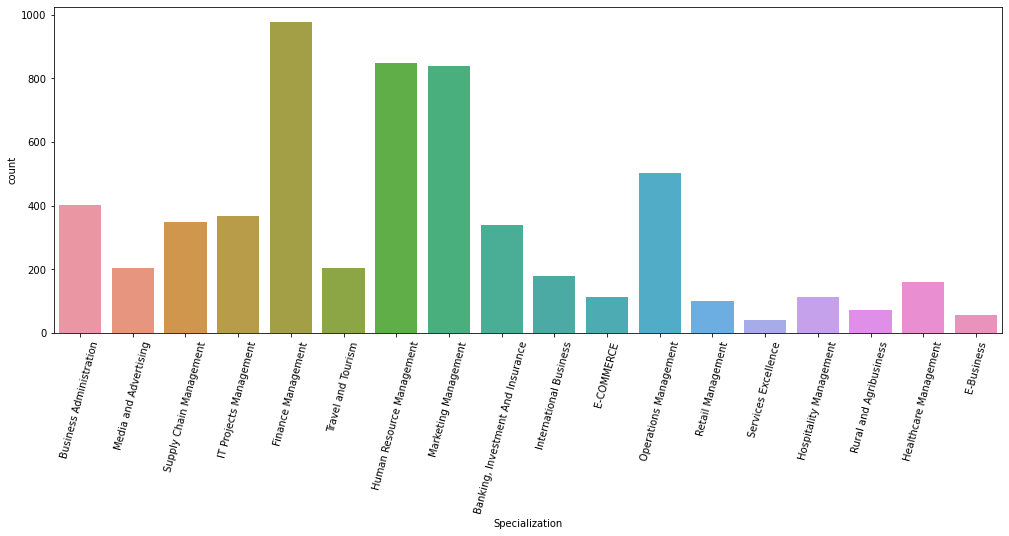

In [13]:
plt.figure(figsize=(17,6))
sns.countplot(lead_score['Specialization'])
plt.xticks(rotation=75)
plt.show()

We have 37% of missing values in Specialization Column.It may be possible that the lead may leave this column blank,if may be student or not having any Specialization may not given in the list,so left blank we can create another category "others" for this..

In [14]:
# Creating the another Category called 'Other',left the Blank in Specialization
lead_score['Specialization']=lead_score['Specialization'].replace(np.nan,'others')

In [15]:
round(lead_score['Specialization'].value_counts(normalize=True),2)*100

others                               37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    2.0
Media and Advertising                 2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: Specialization, dtype: float64

#### 2) City Columns
This Column has 39% of missinng Values

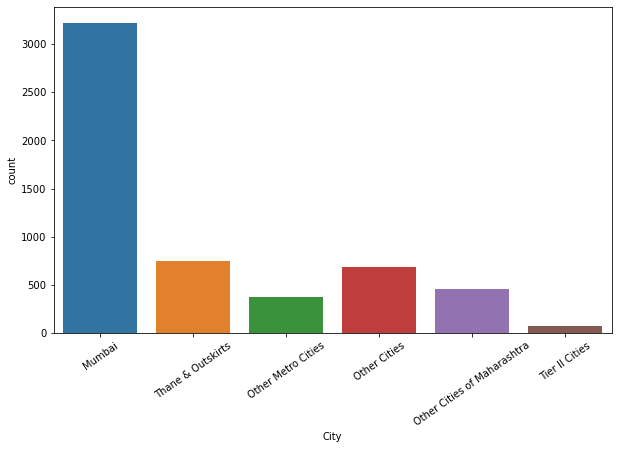

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(lead_score['City'])
plt.xticks(rotation=35)
plt.show()

In [17]:
# find the percentage of the different categories of this columns
round(lead_score['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Most of the customers are from "Mumbai".We can impute missing values in this columns with this value.

In [18]:
# imputing the missing values with Mumbai,have more customers, we can consider as mumbai,using the mode can do same it will also done.
lead_score['City']=lead_score['City'].replace(np.nan,"Mumbai")

In [19]:
# find the percentage of the different categories of this columns after imputation
round(lead_score['City'].value_counts(normalize=True),2)*100

Mumbai                         75.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: City, dtype: float64

#### 3.Tags Column
Tags has 36% of Missing values

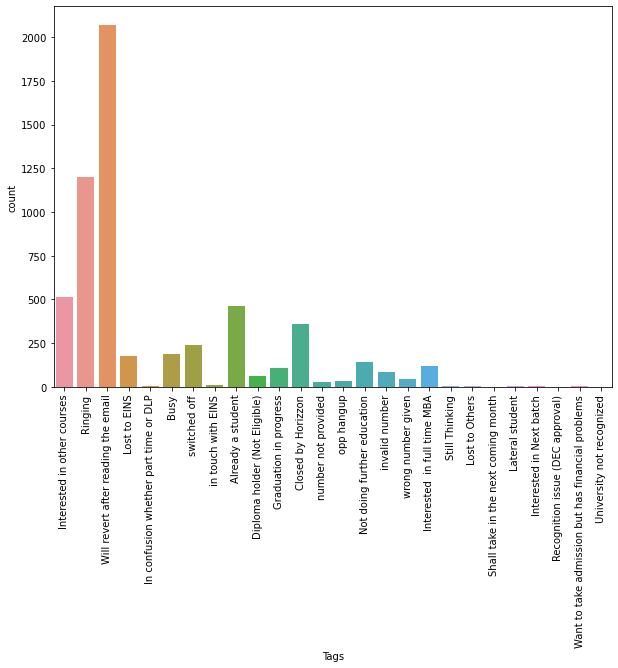

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(lead_score["Tags"])
plt.xticks(rotation=90)
plt.show()

Most of the customers are reply "Will revert after reading the email".

In [21]:
round(lead_score['Tags'].value_counts(normalize=True),2)*100

Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            1.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

In [22]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_score['Tags']=lead_score['Tags'].replace(np.nan,'Will revert after reading the email')

In [23]:
round(lead_score['Tags'].value_counts(normalize=True),2)*100

Will revert after reading the email                  59.0
Ringing                                              13.0
Interested in other courses                           6.0
Already a student                                     5.0
Closed by Horizzon                                    4.0
switched off                                          3.0
Busy                                                  2.0
Lost to EINS                                          2.0
Not doing further education                           2.0
Interested  in full time MBA                          1.0
Graduation in progress                                1.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            0.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

#### 4.What is your current occupation Column
This has 23% of missing values

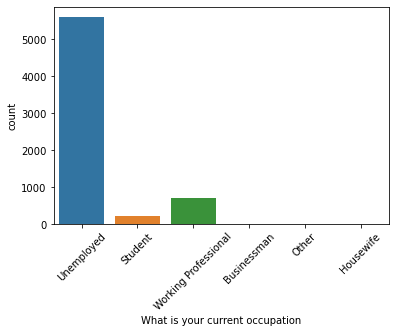

In [24]:
sns.countplot(lead_score['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [25]:
#  finding Percentage of this column
round(lead_score['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Current occupation of customer are "unemployed" are high

In [26]:
lead_score['What is your current occupation']=lead_score['What is your current occupation'].replace(np.nan,'Unemployed')

In [27]:
# Finding the percentage of this column after imputing the high values
round(lead_score['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              90.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

#### 5.What matters most to you in choosing a course column
This has 29% of missing values

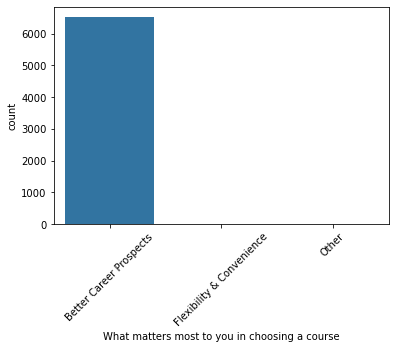

In [28]:
sns.countplot(lead_score['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [29]:
round(lead_score['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can see that is highly skewed column so we can remove this column

In [30]:
lead_score.drop('What matters most to you in choosing a course',axis=1,inplace=True)

#### 6.Country Column
Country has 26% of missing Values

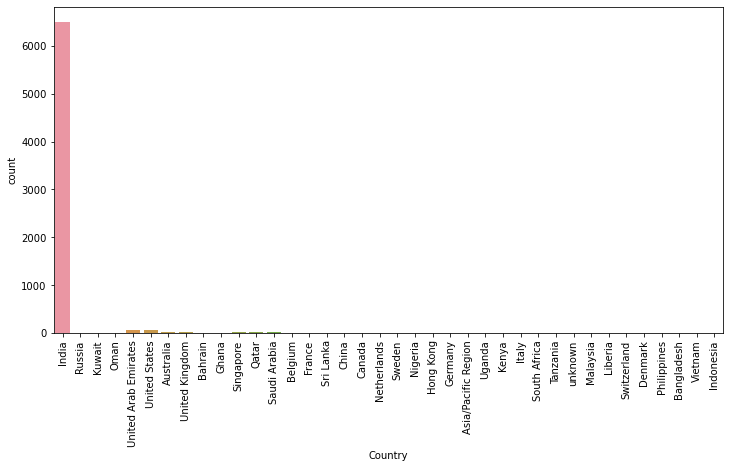

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(lead_score['Country'])
plt.xticks(rotation=90)
plt.show()

Most of customer are from "india" 

In [32]:
# Finding the percenatage of this column
round(lead_score['Country'].value_counts(normalize=True),2)*100

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [33]:
# Imputing the missing data in the 'Country' column with 'India'
lead_score['Country']=lead_score['Country'].replace(np.nan,'India')

In [34]:
# Finding the percenatage of this column after the imputation
round(lead_score['Country'].value_counts(normalize=True),2)*100

India                   97.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [35]:
# Finding the Missing Values after Imputation and droping Column 
100*round(lead_score.isnull().mean(),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Still we have 2% of missing values ,we can drop them

In [36]:
# dropping the rows with null values
lead_score.dropna(inplace=True)

In [37]:
# After dropping null values in rows
100*round(lead_score.isnull().mean(),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing values

In [38]:
#### Percentage of rows retained
(len(lead_score.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data

## Exploratory Data Analysis

In [39]:
lead_score[lead_score.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No Duplicated record in our dataset

In [40]:
lead_score.shape

(9074, 29)

In [41]:
lead_score.nunique()

Prospect ID                                 9074
Lead Number                                 9074
Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
Country                                       38
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendati

In [42]:
id_cols=['Prospect ID','Lead Number']
cont_cols=['Last Notable Activity','Tags','Specialization','Country','Last Activity','Page Views Per Visit','Total Time Spent on Website']
cat_cols=['A free copy of Mastering The Interview','I agree to pay the amount through cheque','City','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search','What is your current occupation','TotalVisits','Do Not Call','Do Not Email','Lead Origin','Lead Source']
target=['Converted']
len(id_cols+cont_cols+cat_cols+target)

29

## Univariate Analysis and Bivariate Analysis

#### 1.Lead Origin

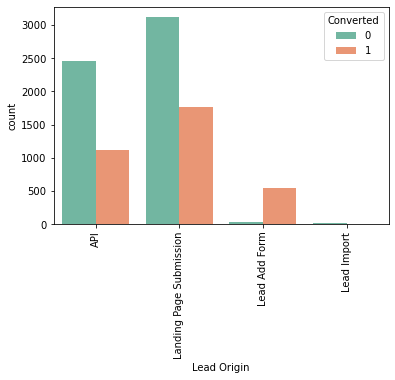

In [43]:
sns.countplot(x='Lead Origin',hue="Converted",data=lead_score,palette='Set2')
plt.xticks(rotation=90)
plt.show()

Inference:
    1.API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
    2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.
    3.Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### 2.Lead Source

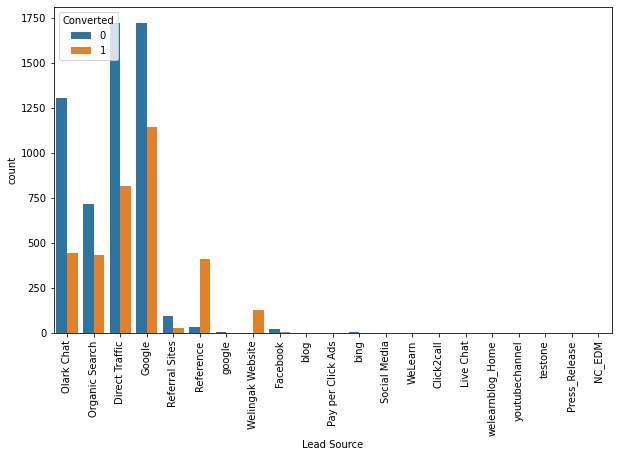

In [44]:
plt.figure(figsize=(10,6))
sns.countplot("Lead Source",hue="Converted",data=lead_score)
plt.xticks(rotation=90)
plt.show()

In [45]:
#lead_score["Lead Source"].replace("google","Google")

In [46]:
lead_score=lead_score.replace(["google"],"Google")

In [47]:
lead_score['Lead Source']=lead_score['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

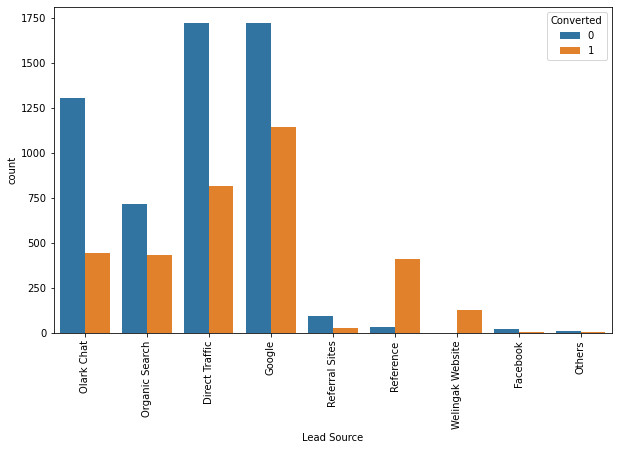

In [48]:
plt.figure(figsize=(10,6))
sns.countplot("Lead Source",hue="Converted",data=lead_score)
plt.xticks(rotation=90)
plt.show()

#### 3.Do Not Email

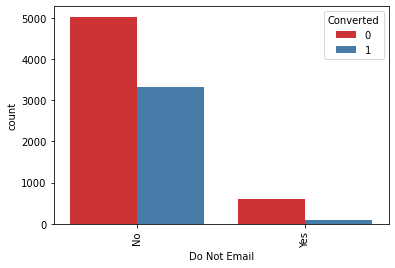

In [49]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_score,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter

#### 5.Do Not Call

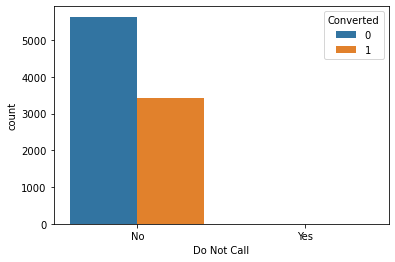

In [50]:
sns.countplot("Do Not Call",hue="Converted",data=lead_score)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter

#### 6.TotalVisits

In [51]:
lead_score["TotalVisits"].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

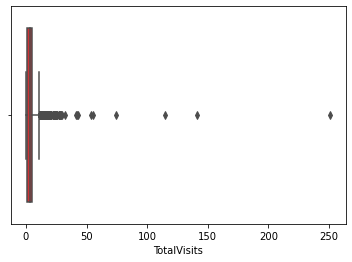

In [52]:
sns.boxplot(lead_score['TotalVisits'],orient='vert',palette='Set1')

In [53]:
percentiles = lead_score['TotalVisits'].quantile([0.05,0.95]).values
lead_score['TotalVisits'][lead_score['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_score['TotalVisits'][lead_score['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

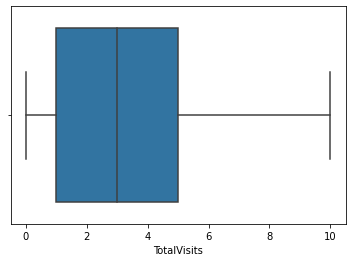

In [54]:
sns.boxplot(lead_score['TotalVisits'],orient='vert')

We have more see there more number of outliers in the data

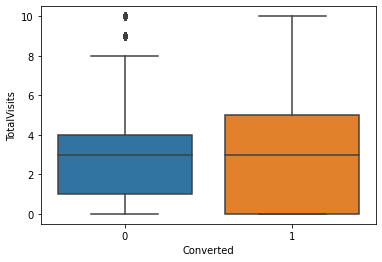

In [55]:
sns.boxplot(y ='TotalVisits', x = 'Converted', data = lead_score)
plt.show()

A free copy of Mastering The Interview


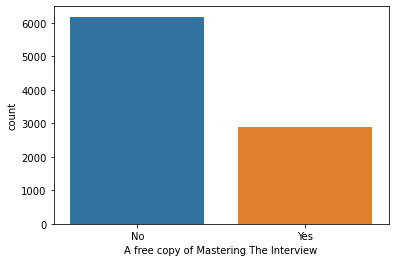

I agree to pay the amount through cheque


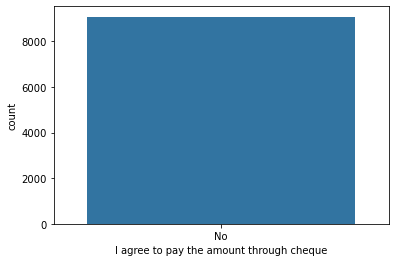

City


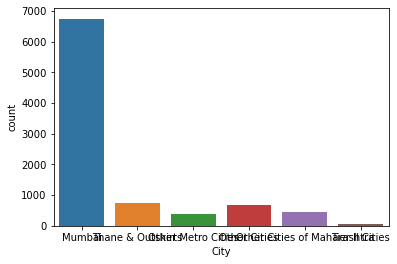

Get updates on DM Content


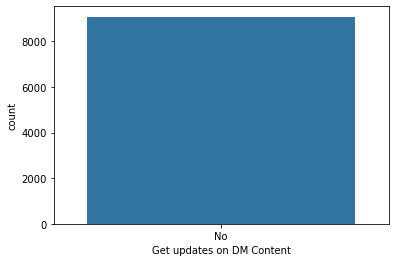

Update me on Supply Chain Content


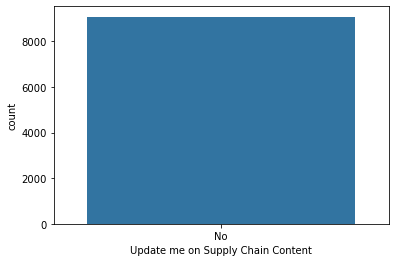

Receive More Updates About Our Courses


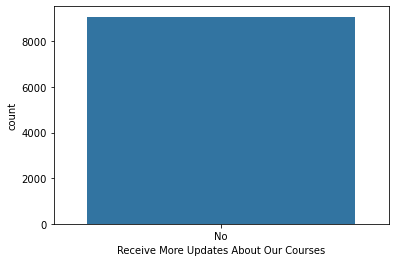

Through Recommendations


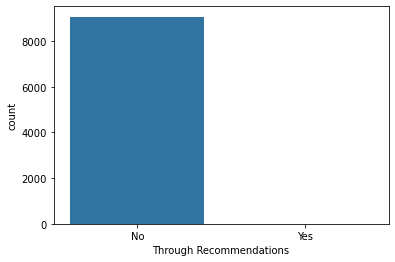

Digital Advertisement


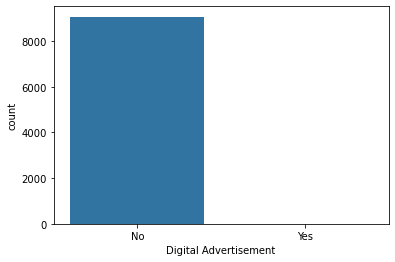

Newspaper


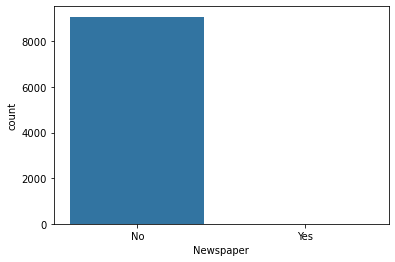

X Education Forums


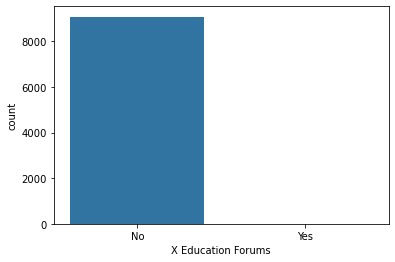

Newspaper Article


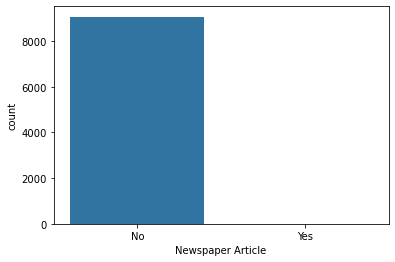

Magazine


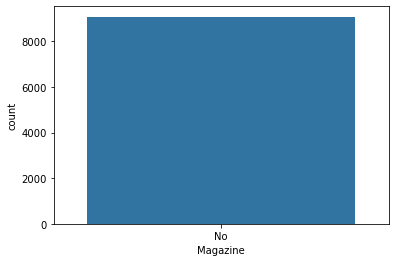

Search


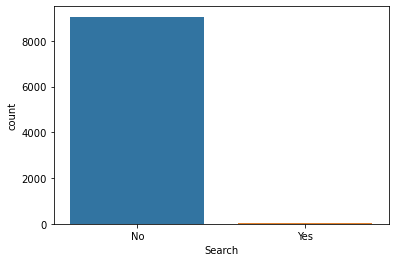

What is your current occupation


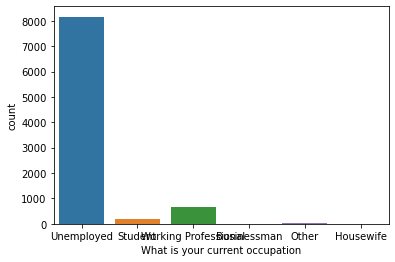

TotalVisits


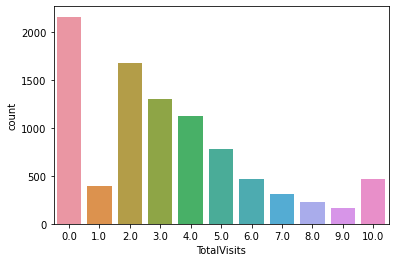

Do Not Call


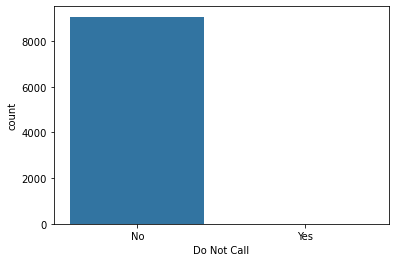

Do Not Email


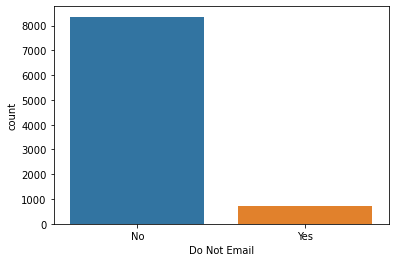

Lead Origin


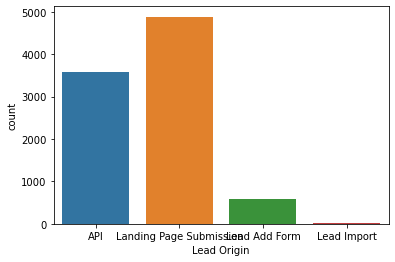

Lead Source


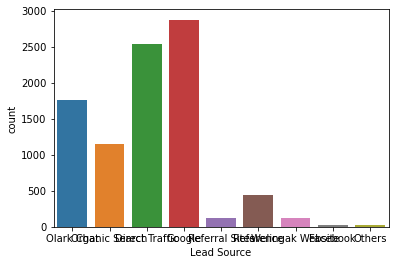

In [56]:
for i in cat_cols:
    print(i)
    sns.countplot(lead_score[i])
    plt.show()

Last Notable Activity


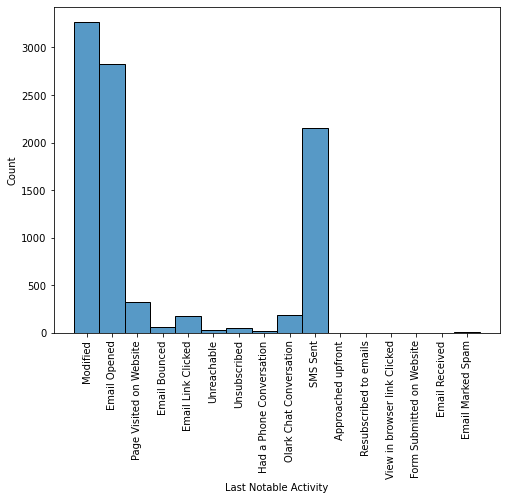

Tags


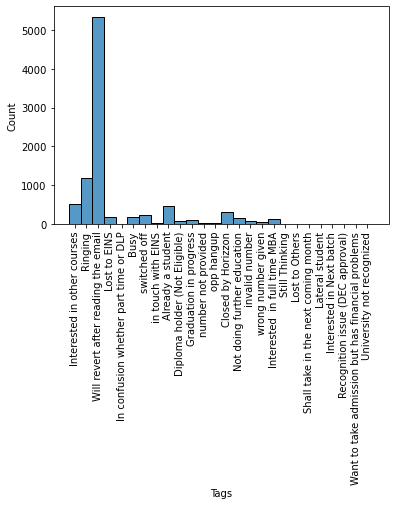

Specialization


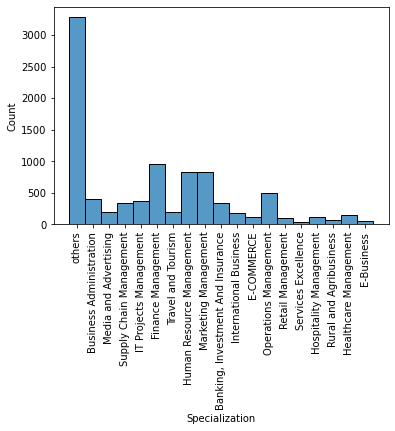

Country


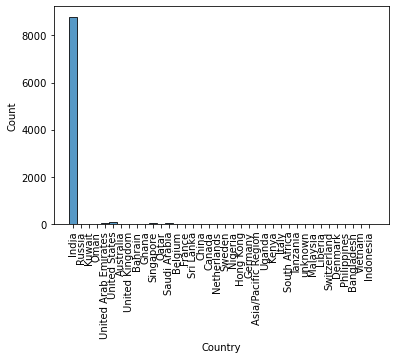

Last Activity


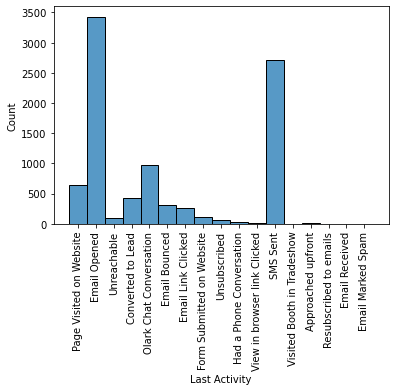

Page Views Per Visit


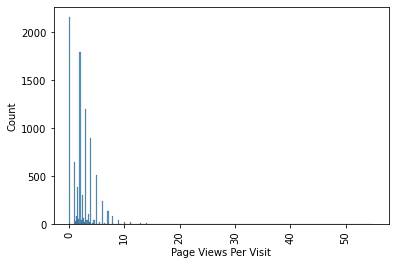

Total Time Spent on Website


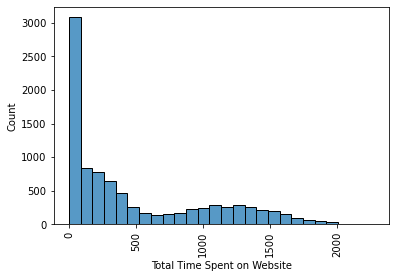

In [57]:
plt.figure(figsize=(8,6))
for i in cont_cols:
    print(i)
    sns.histplot(lead_score[i])
    plt.xticks(rotation=90)
    plt.show()

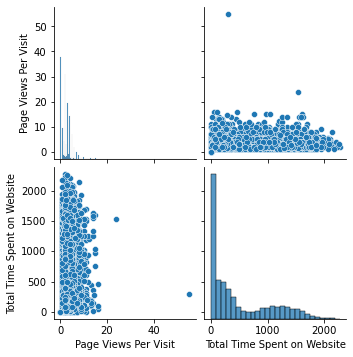

In [58]:
sns.pairplot(lead_score[cont_cols])

<AxesSubplot:>

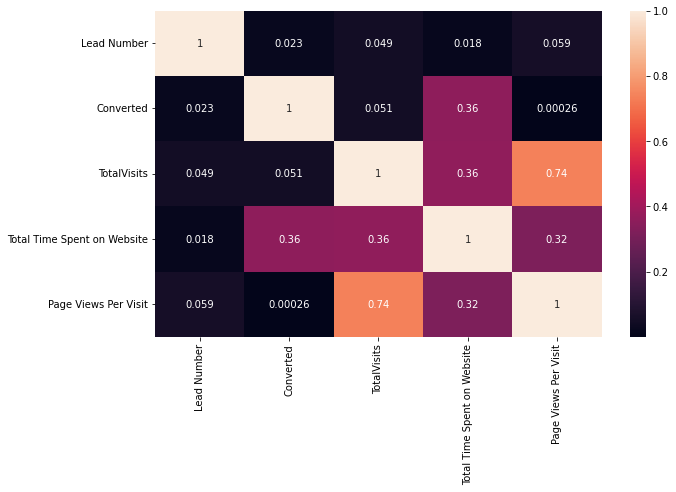

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(lead_score.corr(),annot=True)

In [60]:
lead_score = lead_score.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [61]:
lead_score.shape

(9074, 14)

In [62]:
lead_score.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

# Data Preparation

#### 1)Converting some binary variables (Yes/No) to 1/0

In [63]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_score[vars] = lead_score[vars].apply(binary_map)

### 2) Creating Dummy variables for the categorical features:

In [64]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_score[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# Concatenating the dummy_data to the lead_data dataframe
lead_score = pd.concat([lead_score, dummy_data], axis=1)
lead_score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the columns for which dummies were created

In [66]:
lead_score = lead_score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [67]:
lead_score.head(3)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
100*lead_score.isnull().mean()

Prospect ID                                           0.0
Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
TotalVisits                                           0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 77, dtype: float64

### 3) Spliting the data inti train and test

In [69]:
# putting feature variable ot x
x=lead_score.drop(["Converted","Prospect ID"],axis=1)
# Putting target variable into y
y=lead_score["Converted"]

In [70]:
x.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [71]:
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
# importing the libary for "train_test split"
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=1)

In [73]:
print("Train x shape:",x_train.shape)
print("Test x shape:",x_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train x shape: (6351, 75)
Test x shape: (2723, 75)
Train y shape: (6351,)
Test y shape: (2723,)


## Additional Preprocessing

In [74]:
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7656,1,0,6.0,352,6.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7775,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5287,0,0,4.0,209,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3315,0,0,10.0,1500,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4058,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
x_test.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4079,0,0,4.0,1458,4.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8310,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
y_train.head(2)

7656    0
7775    0
Name: Converted, dtype: int64

In [77]:
y_test.head(2)

4079    0
8310    1
Name: Converted, dtype: int64

In [78]:
100*x_train.isnull().mean()

Do Not Email                                          0.0
Do Not Call                                           0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 75, dtype: float64

There is no Missing values in train data

In [79]:
100*x_test.isnull().mean()

Do Not Email                                          0.0
Do Not Call                                           0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 75, dtype: float64

### Scaling

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7656,1,0,1.030419,-0.236218,1.704925,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7775,0,0,-1.141566,-0.882958,-1.087151,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5287,0,0,0.306424,-0.498956,0.774233,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3315,0,0,2.478409,1.873037,-0.156459,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4058,0,0,-1.141566,-0.882958,-1.087151,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
# Checking the Lead Conversion rate
Converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
Converted

37.85541106458012

In [82]:
lead_score.shape

(9074, 77)

We have almost 38% lead conversion rate.

# Feature Selection

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=20)
selector=selector.fit(x_train,y_train)

In [84]:
selector.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False])

In [85]:
list(zip(x_train.columns, selector.support_, selector.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 49),
 ('Last Activity_Email Marked Spam', False, 20),
 ('Last Activity_Email Opened', False, 13),
 ('Last Activity_Email Received', False, 41),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 

In [86]:
# Viewing columns selected by RFE
cols = x_train.columns[selector.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Unsubscribed',
       'Specialization_others', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

# Model Building

#### Model 1

In [87]:
import statsmodels.api as sm

In [88]:
x_train_sm = sm.add_constant(x_train[cols])
model1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.3
Date:                Mon, 05 Jun 2023   Deviance:                       5204.6
Time:                        18:52:15   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3986
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4377      0.242      1.806      0.071      -0.037       0.913
Do Not Email                                            -1.4306      0.207     -6.924      0.000      -1.835      -1.026
Total Time Spent on Website                              1.0683      0.040     26.707      0.000       0.990       1.147
Lead Origin_Landing Page Submission                     -1.2064      0.129     -9.355      0.000      -1.459      -0.954
Lead Origin_Lead Add Form                                1.7285      0.850      2.033      0.042       0.062       3.395
Lead Source_Olark Chat                                   1.0861      0.124      8.786      0.000       0.844       1.328
Lead Source_Reference                                    1.7096      0.879      1.946      0.052      -0.012       3.431
Lead Source_Welingak Website                             4.8291      1.326      3.641      0.000       2.229       7.429
Last Activity_Converted to Lead                         -1.1121      0.204     -5.460      0.000      -1.511      -0.713
Last Activity_Email Bounced                             -0.7786      0.405     -1.923      0.054      -1.572       0.015
Last Activity_Form Submitted on Website                 -1.1691      0.354     -3.299      0.001      -1.864      -0.474
Last Activity_Had a Phone Conversation                   0.9694      0.950      1.021      0.307      -0.892       2.831
Last Activity_Olark Chat Conversation                   -1.3481      0.161     -8.371      0.000      -1.664      -1.032
Last Activity_Unsubscribed                               1.1644      0.451      2.581      0.010       0.280       2.048
Specialization_others                                   -1.3341      0.126    -10.562      0.000      -1.582      -1.087
What is your current occupation_Housewife               22.4739   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Unemployed              -0.6162      0.213     -2.900      0.004      -1.033      -0.200
What is your current occupation_Working Professional     1.9470      0.283      6.885      0.000       1.393       2.501
Last Notable Activity_Had a Phone Conversation           2.2281      1.469      1.517      0.129      -0.651       5.107
Last Notable Activity_SMS Sent                           1.5358      0.081     18.856      0.000       1.376       1.695
Last Notable Activity_Unreachable                        1.5375      0.542      2.835      0.005       0.474       2.600
========================================================================================================================
"""

Since P value of"What is your current occupation_Housewife" is very high,so we can drop 

In [89]:
# Drop the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

### Model2

In [90]:
x_train_sm = sm.add_constant(x_train[col1])
model2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.6
Date:                Mon, 05 Jun 2023   Deviance:                       5215.1
Time:                        18:52:15   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5652      0.236      2.391      0.017       0.102       1.028
Do Not Email                                            -1.4332      0.207     -6.937      0.000      -1.838      -1.028
Total Time Spent on Website                              1.0674      0.040     26.714      0.000       0.989       1.146
Lead Origin_Landing Page Submission                     -1.2018      0.129     -9.334      0.000      -1.454      -0.949
Lead Origin_Lead Add Form                                1.7307      0.850      2.036      0.042       0.064       3.397
Lead Source_Olark Chat                                   1.0822      0.124      8.759      0.000       0.840       1.324
Lead Source_Reference                                    1.7108      0.878      1.948      0.051      -0.011       3.432
Lead Source_Welingak Website                             4.8291      1.326      3.641      0.000       2.229       7.429
Last Activity_Converted to Lead                         -1.1176      0.204     -5.490      0.000      -1.517      -0.719
Last Activity_Email Bounced                             -0.7836      0.405     -1.934      0.053      -1.578       0.011
Last Activity_Form Submitted on Website                 -1.0784      0.345     -3.123      0.002      -1.755      -0.402
Last Activity_Had a Phone Conversation                   0.9689      0.949      1.021      0.307      -0.892       2.829
Last Activity_Olark Chat Conversation                   -1.3513      0.161     -8.390      0.000      -1.667      -1.036
Last Activity_Unsubscribed                               1.1652      0.451      2.584      0.010       0.281       2.049
Specialization_others                                   -1.3334      0.126    -10.570      0.000      -1.581      -1.086
What is your current occupation_Unemployed              -0.7457      0.205     -3.629      0.000      -1.148      -0.343
What is your current occupation_Working Professional     1.8149      0.277      6.544      0.000       1.271       2.359
Last Notable Activity_Had a Phone Conversation           2.2260      1.469      1.516      0.130      -0.652       5.105
Last Notable Activity_SMS Sent                           1.5343      0.081     18.837      0.000       1.375       1.694
Last Notable Activity_Unreachable                        1.5373      0.542      2.835      0.005       0.474       2.600
========================================================================================================================
"""

Since P value of"Last Notable Activity_Had a Phone Conversation" is very high, so we can drop

In [91]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### model 3

In [92]:
x_train_sm = sm.add_constant(x_train[col1])
model3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.8
Date:                Mon, 05 Jun 2023   Deviance:                       5217.6
Time:                        18:52:15   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5652      0.236      2.392      0.017       0.102       1.028
Do Not Email                                            -1.4383      0.206     -6.969      0.000      -1.843      -1.034
Total Time Spent on Website                              1.0662      0.040     26.696      0.000       0.988       1.145
Lead Origin_Landing Page Submission                     -1.2008      0.129     -9.329      0.000      -1.453      -0.949
Lead Origin_Lead Add Form                                1.7302      0.850      2.035      0.042       0.064       3.396
Lead Source_Olark Chat                                   1.0824      0.124      8.759      0.000       0.840       1.325
Lead Source_Reference                                    1.7100      0.878      1.947      0.052      -0.011       3.432
Lead Source_Welingak Website                             4.8305      1.326      3.642      0.000       2.231       7.430
Last Activity_Converted to Lead                         -1.1173      0.204     -5.489      0.000      -1.516      -0.718
Last Activity_Email Bounced                             -0.7790      0.405     -1.923      0.054      -1.573       0.015
Last Activity_Form Submitted on Website                 -1.0785      0.345     -3.124      0.002      -1.755      -0.402
Last Activity_Had a Phone Conversation                   2.1034      0.680      3.095      0.002       0.771       3.435
Last Activity_Olark Chat Conversation                   -1.3508      0.161     -8.387      0.000      -1.666      -1.035
Last Activity_Unsubscribed                               1.1698      0.451      2.595      0.009       0.286       2.053
Specialization_others                                   -1.3350      0.126    -10.584      0.000      -1.582      -1.088
What is your current occupation_Unemployed              -0.7454      0.205     -3.628      0.000      -1.148      -0.343
What is your current occupation_Working Professional     1.8148      0.277      6.544      0.000       1.271       2.358
Last Notable Activity_SMS Sent                           1.5342      0.081     18.840      0.000       1.375       1.694
Last Notable Activity_Unreachable                        1.5369      0.542      2.834      0.005       0.474       2.600
========================================================================================================================
"""

### Checking for VIP values

In [93]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train[col1].columns
vif["VIF"]=[variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif["VIF"]=round(vif["VIF"])
vif

,Features,VIF
0,Do Not Email,2.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,6.0
3,Lead Origin_Lead Add Form,46.0
4,Lead Source_Olark Chat,2.0
5,Lead Source_Reference,36.0
6,Lead Source_Welingak Website,11.0
7,Last Activity_Converted to Lead,1.0
8,Last Activity_Email Bounced,2.0
9,Last Activity_Form Submitted on Website,1.0


In [94]:
# Dropping the column  'Lead Origin_Lead Add Form' because it has high VIF
col1 = col1.drop('Lead Origin_Lead Add Form')

### Model 4

In [95]:
x_train_sm = sm.add_constant(x_train[col1])
model4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.2
Date:                Mon, 05 Jun 2023   Deviance:                       5222.5
Time:                        18:52:16   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3969
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5945      0.236      2.518      0.012       0.132       1.057
Do Not Email                                            -1.4404      0.206     -6.980      0.000      -1.845      -1.036
Total Time Spent on Website                              1.0631      0.040     26.673      0.000       0.985       1.141
Lead Origin_Landing Page Submission                     -1.2304      0.128     -9.603      0.000      -1.482      -0.979
Lead Source_Olark Chat                                   1.0696      0.123      8.681      0.000       0.828       1.311
Lead Source_Reference                                    3.4180      0.256     13.359      0.000       2.917       3.919
Lead Source_Welingak Website                             6.5465      1.024      6.395      0.000       4.540       8.553
Last Activity_Converted to Lead                         -1.1219      0.203     -5.514      0.000      -1.521      -0.723
Last Activity_Email Bounced                             -0.7787      0.405     -1.923      0.054      -1.572       0.015
Last Activity_Form Submitted on Website                 -1.0877      0.345     -3.150      0.002      -1.765      -0.411
Last Activity_Had a Phone Conversation                   2.0996      0.680      3.089      0.002       0.768       3.432
Last Activity_Olark Chat Conversation                   -1.3565      0.161     -8.423      0.000      -1.672      -1.041
Last Activity_Unsubscribed                               1.1669      0.451      2.590      0.010       0.284       2.050
Specialization_others                                   -1.3556      0.126    -10.770      0.000      -1.602      -1.109
What is your current occupation_Unemployed              -0.7428      0.206     -3.614      0.000      -1.146      -0.340
What is your current occupation_Working Professional     1.8130      0.277      6.534      0.000       1.269       2.357
Last Notable Activity_SMS Sent                           1.5343      0.081     18.845      0.000       1.375       1.694
Last Notable Activity_Unreachable                        1.5294      0.542      2.820      0.005       0.466       2.593
========================================================================================================================
"""

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train[col1].columns
vif["VIF"]=[variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif["VIF"]=round(vif["VIF"])
vif

,Features,VIF
0,Do Not Email,2.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,6.0
3,Lead Source_Olark Chat,2.0
4,Lead Source_Reference,1.0
5,Lead Source_Welingak Website,1.0
6,Last Activity_Converted to Lead,1.0
7,Last Activity_Email Bounced,2.0
8,Last Activity_Form Submitted on Website,1.0
9,Last Activity_Had a Phone Conversation,1.0


In [97]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

### Model 5

In [98]:
x_train_sm = sm.add_constant(x_train[col1])
model5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.5
Date:                Mon, 05 Jun 2023   Deviance:                       5235.0
Time:                        18:52:16   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3957
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1275      0.124     -1.028      0.304      -0.370       0.115
Do Not Email                                            -1.4435      0.206     -6.999      0.000      -1.848      -1.039
Total Time Spent on Website                              1.0630      0.040     26.699      0.000       0.985       1.141
Lead Origin_Landing Page Submission                     -1.2239      0.128     -9.568      0.000      -1.475      -0.973
Lead Source_Olark Chat                                   1.0828      0.123      8.796      0.000       0.842       1.324
Lead Source_Reference                                    3.4372      0.255     13.473      0.000       2.937       3.937
Lead Source_Welingak Website                             6.5338      1.023      6.385      0.000       4.528       8.540
Last Activity_Converted to Lead                         -1.1196      0.204     -5.498      0.000      -1.519      -0.720
Last Activity_Email Bounced                             -0.7643      0.404     -1.894      0.058      -1.555       0.027
Last Activity_Form Submitted on Website                 -1.0957      0.346     -3.164      0.002      -1.774      -0.417
Last Activity_Had a Phone Conversation                   2.0740      0.679      3.053      0.002       0.742       3.406
Last Activity_Olark Chat Conversation                   -1.3521      0.161     -8.404      0.000      -1.667      -1.037
Last Activity_Unsubscribed                               1.1499      0.451      2.551      0.011       0.266       2.034
Specialization_others                                   -1.3598      0.126    -10.803      0.000      -1.607      -1.113
What is your current occupation_Working Professional     2.5321      0.194     13.058      0.000       2.152       2.912
Last Notable Activity_SMS Sent                           1.5172      0.081     18.708      0.000       1.358       1.676
Last Notable Activity_Unreachable                        1.5051      0.542      2.776      0.006       0.442       2.568
========================================================================================================================
"""

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train[col1].columns
vif["VIF"]=[variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif["VIF"]=round(vif["VIF"])
vif

,Features,VIF
0,Do Not Email,2.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Source_Olark Chat,2.0
4,Lead Source_Reference,1.0
5,Lead Source_Welingak Website,1.0
6,Last Activity_Converted to Lead,1.0
7,Last Activity_Email Bounced,2.0
8,Last Activity_Form Submitted on Website,1.0
9,Last Activity_Had a Phone Conversation,1.0


Since P values of all variable is less than 0.05 and VIF values are low for all variables(less than 5) then we have final the model 5.we have 16 variable in our model 

#### Making Prediction on the train set

In [100]:
y_train_pred = result5.predict(x_train_sm)
y_train_pred[:5]

7656    0.178172
7775    0.063262
5287    0.132189
3315    0.654675
4058    0.996407
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.17817246, 0.06326219, 0.13218896, 0.65467536, 0.99640706])

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.178172,7656
1,0,0.063262,7775
2,0,0.132189,5287
3,1,0.654675,3315
4,1,0.996407,4058


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [103]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.178172,7656,0
1,0,0.063262,7775,0
2,0,0.132189,5287,0
3,1,0.654675,3315,1
4,1,0.996407,4058,1


### Making the Confusion matrix

In [104]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3477  462]
 [ 713 1699]]


In [105]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.814989765391277


In [106]:
# Metric beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7043946932006634


In [108]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8827113480578828


In [109]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))


False Positive Rate : 0.1172886519421173


In [110]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7862100879222582


In [111]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8298329355608592


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

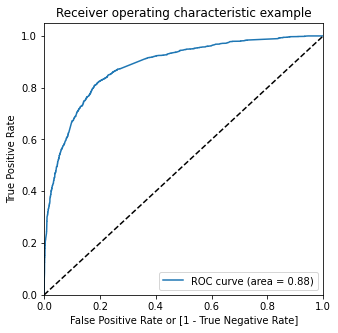

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.

In [115]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.178172,7656,0,1,1,0,0,0,0,0,0,0,0
1,0,0.063262,7775,0,1,0,0,0,0,0,0,0,0,0
2,0,0.132189,5287,0,1,1,0,0,0,0,0,0,0,0
3,1,0.654675,3315,1,1,1,1,1,1,1,1,0,0,0
4,1,0.996407,4058,1,1,1,1,1,1,1,1,1,1,1


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379783  1.000000  0.000000
0.1   0.1  0.586207  0.971808  0.350089
0.2   0.2  0.740671  0.912935  0.635187
0.3   0.3  0.800976  0.839552  0.777355
0.4   0.4  0.813100  0.774461  0.836761
0.5   0.5  0.814990  0.704395  0.882711
0.6   0.6  0.797670  0.587894  0.926123
0.7   0.7  0.785546  0.515340  0.951003
0.8   0.8  0.761927  0.420398  0.971059
0.9   0.9  0.727130  0.297678  0.990099


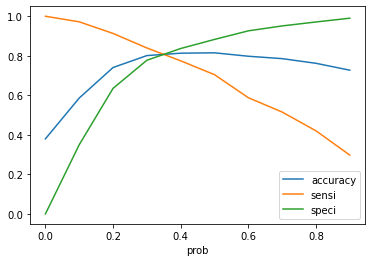

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.178172,7656,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.063262,7775,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.132189,5287,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.654675,3315,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.996407,4058,1,1,1,1,1,1,1,1,1,1,1,1


In [119]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.178172,7656,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.063262,7775,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.132189,5287,0,1,1,0,0,0,0,0,0,0,0,0,13
3,1,0.654675,3315,1,1,1,1,1,1,1,1,0,0,0,1,65
4,1,0.996407,4058,1,1,1,1,1,1,1,1,1,1,1,1,100


In [120]:
# Model Evalution
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))


Accuracy : 0.8116831994961423


In [121]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3169,  770],
       [ 426, 1986]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8233830845771144


In [124]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8045189134298045


In [125]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19548108657019547


In [126]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7206095791001451


### precision and Recall

* Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
* Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm

In [127]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3477,  462],
       [ 713, 1699]], dtype=int64)

In [128]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7862100879222582


In [129]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7043946932006634


In [130]:
# Using sklearn utilities for the same

In [131]:
from sklearn.metrics import precision_score, recall_score

In [132]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))    

Precision : 0.7862100879222582


In [133]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7043946932006634


#### Precision  and recall tradeoff

In [134]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


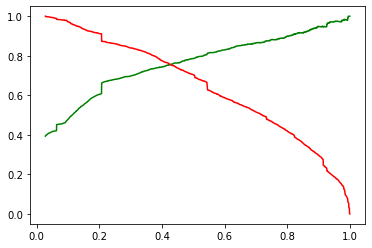

In [136]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [137]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [138]:
x_test = x_test[col1]
x_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Unsubscribed,Specialization_others,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4079,0,1.795869,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8310,0,-0.882958,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1708,0,-0.375855,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8025,0,1.777496,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2414,0,-0.882958,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [139]:
x_test_sm = sm.add_constant(x_test)

# Making predictions on the test set
y_test_pred = result5.predict(x_test_sm)
y_test_pred[:5]

4079    0.635903
8310    0.543429
1708    0.147935
8025    0.599212
2414    0.207007
dtype: float64

In [140]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4079,0.635903
8310,0.543429
1708,0.147935
8025,0.599212
2414,0.207007


In [141]:
y_test_df = pd.DataFrame(y_test)

In [142]:
y_test_df['Prospect ID'] = y_test_df.index

In [143]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4079,0.635903
1,1,8310,0.543429
2,0,1708,0.147935
3,1,8025,0.599212
4,0,2414,0.207007


In [145]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [146]:
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4079,0,0.635903
1,8310,1,0.543429
2,1708,0,0.147935
3,8025,1,0.599212
4,2414,0,0.207007


In [147]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4079,0,0.635903,1
1,8310,1,0.543429,1
2,1708,0,0.147935,0
3,8025,1,0.599212,1
4,2414,0,0.207007,0


In [148]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7976496511200881


In [149]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2


array([[1323,  377],
       [ 174,  849]], dtype=int64)

In [150]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8233830845771144


In [151]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8045189134298045


In [152]:
# Assigning Lead Score to the Testing data
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,4079,0,0.635903,1,64
1,8310,1,0.543429,1,54
2,1708,0,0.147935,0,15
3,8025,1,0.599212,1,60
4,2414,0,0.207007,0,21


# Observation:

#### After running the model on the Test data:
    * Accurancy: 79.76%
    * Sensitivity:82.33%
    * Specificity:80.45%

### Results:
* 1) Comparing the values obtained for Train and Test:
    #### Train Data:
    * Accurancy: 81.11%
    * Sensitivity:82.33%
    * Specificity:80.45%
    #### Test Data:
    * Accurancy: 79.76%
    * Sensitivity:82.33%
    * Specificity:80.45%

In [153]:
result5.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.533812
Lead Source_Reference                                   3.437215
What is your current occupation_Working Professional    2.532059
Last Activity_Had a Phone Conversation                  2.074002
Last Notable Activity_SMS Sent                          1.517214
Last Notable Activity_Unreachable                       1.505057
Last Activity_Unsubscribed                              1.149938
Lead Source_Olark Chat                                  1.082782
Total Time Spent on Website                             1.062986
const                                                  -0.127459
Last Activity_Email Bounced                            -0.764276
Last Activity_Form Submitted on Website                -1.095685
Last Activity_Converted to Lead                        -1.119573
Lead Origin_Landing Page Submission                    -1.223899
Last Activity_Olark Chat Conversation                  -1.352056
Specialization_others    